In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tqdm import tqdm

In [41]:
DATADIR ='C:\\Users\\Unzela Inamdar\\Downloads\\Dataset'
CATEGORIES = ['Black','Blue','Green','red','White','yellow']
IMG_SIZE=100

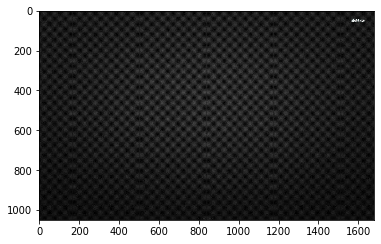

In [42]:
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [43]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [44]:
print(len(training_data))

67


In [45]:
lenofimage = len(training_data)

In [46]:
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)

In [47]:
X.shape

(67, 30000)

In [48]:
X = X/255.0

In [49]:
X[1]

array([0.03921569, 0.03137255, 0.03137255, ..., 0.55294118, 0.54509804,
       0.54117647])

In [50]:
y=np.array(y)

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [52]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',gamma='auto')
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [53]:
y2 = svc.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score
print("Accuracy on unknown data is",accuracy_score(y_test,y2))

Accuracy on unknown data is 0.9411764705882353


In [55]:
from sklearn.metrics import classification_report
print("Accuracy on unknown data is",classification_report(y_test,y2))

Accuracy on unknown data is               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      0.67      0.80         3
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         5
           4       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         2

    accuracy                           0.94        17
   macro avg       0.96      0.94      0.94        17
weighted avg       0.96      0.94      0.94        17



In [56]:
result = pd.DataFrame({'original' : y_test,'predicted' : y2})

In [57]:
result

,original,predicted
0,3,3
1,1,1
2,0,0
3,3,3
4,3,3
5,0,0
6,1,1
7,4,4
8,1,4
9,3,3
